# Análise de Dados de Logística Simulada - PharmaSense AI

Este notebook contém análises exploratórias dos dados de logística simulada, incluindo:
- Análise de tempos de entrega por região e estado
- Análise de custos logísticos
- Análise de emissões de CO2
- Análise de performance e eficiência
- Identificação de padrões e tendências


## 1. Importação de Bibliotecas e Carregamento de Dados


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuração de visualização
plt.style.use('dark_background')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)


In [2]:
# Carregar dados
df = pd.read_csv('assets/logistica_simulada.csv')
df['Data'] = pd.to_datetime(df['Data'])

print(f"Total de registros: {len(df):,}")
print(f"Período: {df['Data'].min().date()} a {df['Data'].max().date()}")
print(f"\nColunas: {list(df.columns)}")
print(f"\nPrimeiras linhas:")
df.head()


Total de registros: 290,099
Período: 2020-02-25 a 2023-03-18

Colunas: ['Data', 'Estado', 'Regiao', 'Rota_ID', 'Tempo_Resposta_Previsto', 'Tempo_Resposta_Real', 'Status', 'Custo_Logistico_USD', 'Emissao_CO2_kg']

Primeiras linhas:


,Data,Estado,Regiao,Rota_ID,Tempo_Resposta_Previsto,Tempo_Resposta_Real,Status,Custo_Logistico_USD,Emissao_CO2_kg
0,2020-02-25,SP,Sudeste,R000001,1.28,1.00,Entregue,132.89,24.33
1,2020-02-28,SP,Sudeste,R000002,1.45,1.00,Entregue,105.48,25.90
2,2020-02-28,SP,Sudeste,R000003,1.27,1.00,Entregue,96.90,31.27
3,2020-03-04,SP,Sudeste,R000004,1.00,1.00,Entregue,119.39,29.42
4,2020-03-05,SP,Sudeste,R000006,1.38,1.04,Entregue,148.26,29.49


## 2. Análise Exploratória Inicial


In [3]:
# Informações gerais
print("Informações do DataFrame:")
print(df.info())
print("\n" + "="*50)
print("\nEstatísticas Descritivas:")
df.describe()


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290099 entries, 0 to 290098
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Data                     290099 non-null  datetime64[ns]
 1   Estado                   290099 non-null  object        
 2   Regiao                   290099 non-null  object        
 3   Rota_ID                  290099 non-null  object        
 4   Tempo_Resposta_Previsto  290099 non-null  float64       
 5   Tempo_Resposta_Real      290099 non-null  float64       
 6   Status                   290099 non-null  object        
 7   Custo_Logistico_USD      290099 non-null  float64       
 8   Emissao_CO2_kg           290099 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 19.9+ MB
None


Estatísticas Descritivas:


,Data,Tempo_Resposta_Previsto,Tempo_Resposta_Real,Custo_Logistico_USD,Emissao_CO2_kg
count,290099,"290,099.00","290,099.00","290,099.00","290,099.00"
mean,2021-08-02 11:44:31.516964864,2.63,1.99,194.46,41.54
min,2020-02-25 00:00:00,1.00,1.00,50.00,10.14
25%,2021-01-02 00:00:00,1.92,1.35,140.39,30.33
50%,2021-06-14 00:00:00,2.39,1.74,175.35,39.02
75%,2022-03-02 00:00:00,2.96,2.28,216.33,47.23
max,2023-03-18 00:00:00,7.24,6.07,530.90,93.77
std,NaN,1.09,0.92,82.87,15.01


Distribuição de Status:
Status
Entregue    288466
Atrasado      1633
Name: count, dtype: int64

Percentual:
Status
Entregue   99.44
Atrasado    0.56
Name: count, dtype: float64


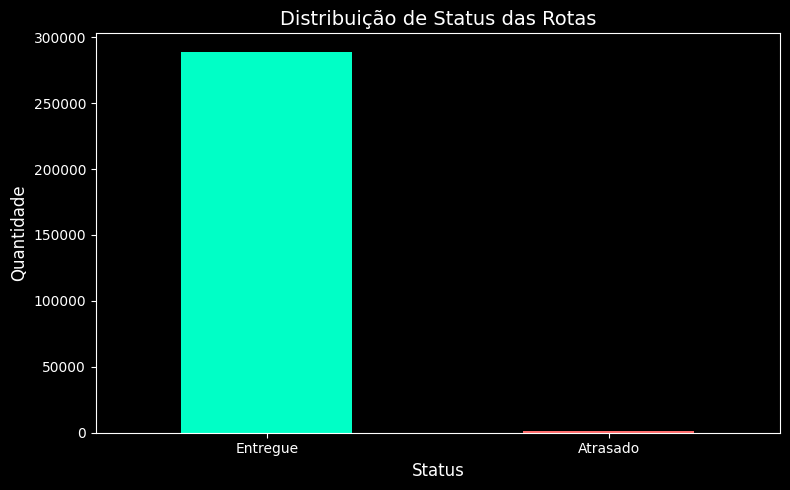

In [4]:
# Distribuição de status
print("Distribuição de Status:")
status_counts = df['Status'].value_counts()
print(status_counts)
print(f"\nPercentual:")
print(status_counts / len(df) * 100)

# Visualização
fig, ax = plt.subplots(figsize=(8, 5))
status_counts.plot(kind='bar', ax=ax, color=['#00FFC6', '#FF6B6B'])
ax.set_title('Distribuição de Status das Rotas', fontsize=14, color='white')
ax.set_xlabel('Status', fontsize=12, color='white')
ax.set_ylabel('Quantidade', fontsize=12, color='white')
ax.tick_params(colors='white')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 3. Análise de Tempos de Entrega


In [5]:
# Tempo médio por região
tempo_por_regiao = df.groupby('Regiao').agg({
    'Tempo_Resposta_Previsto': 'mean',
    'Tempo_Resposta_Real': 'mean'
}).round(2)

tempo_por_regiao['Reducao_Percentual'] = (
    (1 - tempo_por_regiao['Tempo_Resposta_Real'] / tempo_por_regiao['Tempo_Resposta_Previsto']) * 100
).round(2)

print("Tempo Médio de Entrega por Região:")
print(tempo_por_regiao.sort_values('Tempo_Resposta_Real'))


Tempo Médio de Entrega por Região:
              Tempo_Resposta_Previsto  Tempo_Resposta_Real  Reducao_Percentual
Regiao                                                                        
Sudeste                          1.81                 1.30               28.18
Sul                              2.14                 1.50               29.91
Nordeste                         2.62                 1.97               24.81
Centro-Oeste                     2.98                 2.38               20.13
Norte                            5.14                 4.11               20.04


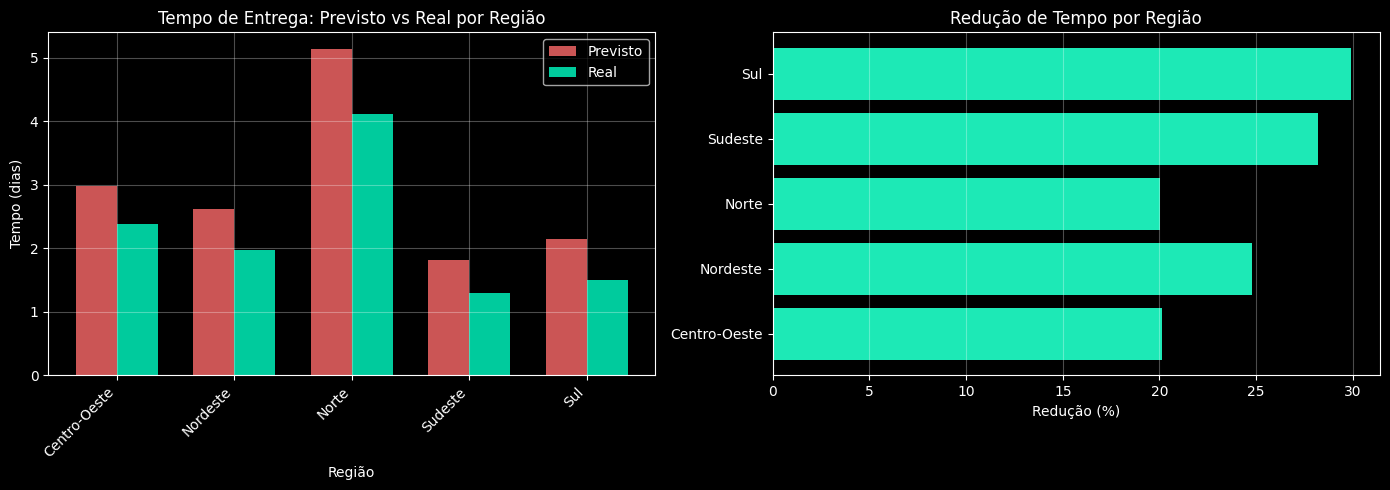

In [6]:
# Visualização: Tempo por região
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Tempo Previsto vs Real
regioes = tempo_por_regiao.index
x = np.arange(len(regioes))
width = 0.35

ax1.bar(x - width/2, tempo_por_regiao['Tempo_Resposta_Previsto'], width, 
        label='Previsto', color='#FF6B6B', alpha=0.8)
ax1.bar(x + width/2, tempo_por_regiao['Tempo_Resposta_Real'], width, 
        label='Real', color='#00FFC6', alpha=0.8)

ax1.set_xlabel('Região', color='white')
ax1.set_ylabel('Tempo (dias)', color='white')
ax1.set_title('Tempo de Entrega: Previsto vs Real por Região', color='white')
ax1.set_xticks(x)
ax1.set_xticklabels(regioes, rotation=45, ha='right', color='white')
ax1.legend()
ax1.tick_params(colors='white')
ax1.grid(alpha=0.3)

# Gráfico 2: Redução percentual
ax2.barh(regioes, tempo_por_regiao['Reducao_Percentual'], color='#1DE9B6')
ax2.set_xlabel('Redução (%)', color='white')
ax2.set_title('Redução de Tempo por Região', color='white')
ax2.tick_params(colors='white')
ax2.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


In [7]:
# Top 10 estados mais rápidos e mais lentos
tempo_por_estado = df.groupby('Estado')['Tempo_Resposta_Real'].mean().sort_values()

print("Top 10 Estados Mais Rápidos:")
print(tempo_por_estado.head(10))
print("\n" + "="*50)
print("\nTop 10 Estados Mais Lentos:")
print(tempo_por_estado.tail(10))


Top 10 Estados Mais Rápidos:
Estado
SP   1.14
MG   1.35
RJ   1.41
ES   1.41
SC   1.48
PR   1.48
RS   1.54
BA   1.73
PB   1.95
PE   1.95
Name: Tempo_Resposta_Real, dtype: float64


Top 10 Estados Mais Lentos:
Estado
DF   2.32
MS   2.48
MT   2.64
AM   3.60
PA   4.16
TO   4.16
RO   4.24
AP   4.31
AC   4.41
RR   4.48
Name: Tempo_Resposta_Real, dtype: float64


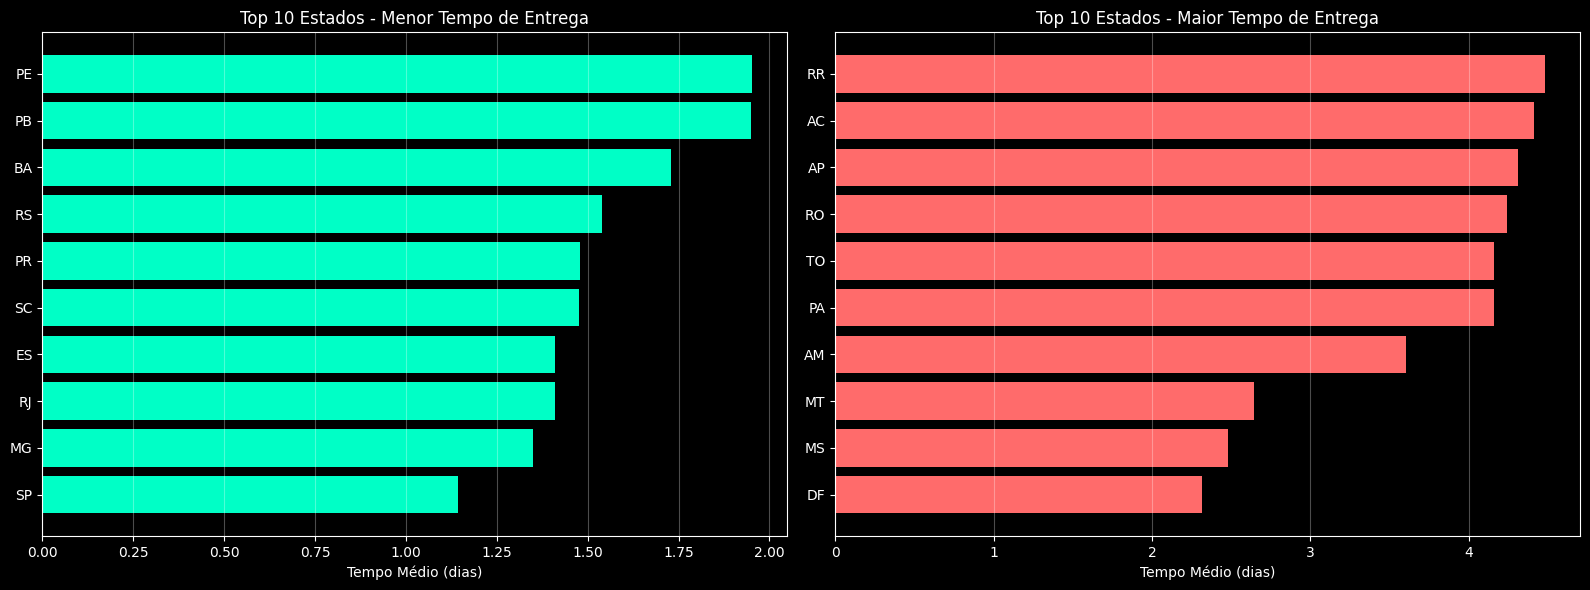

In [8]:
# Visualização: Top estados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Mais rápidos
top_rapidos = tempo_por_estado.head(10)
ax1.barh(top_rapidos.index, top_rapidos.values, color='#00FFC6')
ax1.set_xlabel('Tempo Médio (dias)', color='white')
ax1.set_title('Top 10 Estados - Menor Tempo de Entrega', color='white')
ax1.tick_params(colors='white')
ax1.grid(alpha=0.3, axis='x')

# Mais lentos
top_lentos = tempo_por_estado.tail(10)
ax2.barh(top_lentos.index, top_lentos.values, color='#FF6B6B')
ax2.set_xlabel('Tempo Médio (dias)', color='white')
ax2.set_title('Top 10 Estados - Maior Tempo de Entrega', color='white')
ax2.tick_params(colors='white')
ax2.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


## 4. Análise de Custos Logísticos


In [9]:
# Custo médio por região
custo_por_regiao = df.groupby('Regiao')['Custo_Logistico_USD'].agg([
    'mean', 'median', 'std', 'min', 'max'
]).round(2)

print("Estatísticas de Custo por Região (USD):")
print(custo_por_regiao.sort_values('mean'))


Estatísticas de Custo por Região (USD):
               mean  median   std    min    max
Regiao                                         
Sudeste      131.68  131.71 27.43  50.00 256.41
Sul          153.61  153.60 27.43  50.00 258.88
Nordeste     195.08  194.89 27.99  76.76 310.42
Centro-Oeste 218.25  218.42 27.83 108.80 346.81
Norte        392.47  392.34 35.41 230.48 530.90


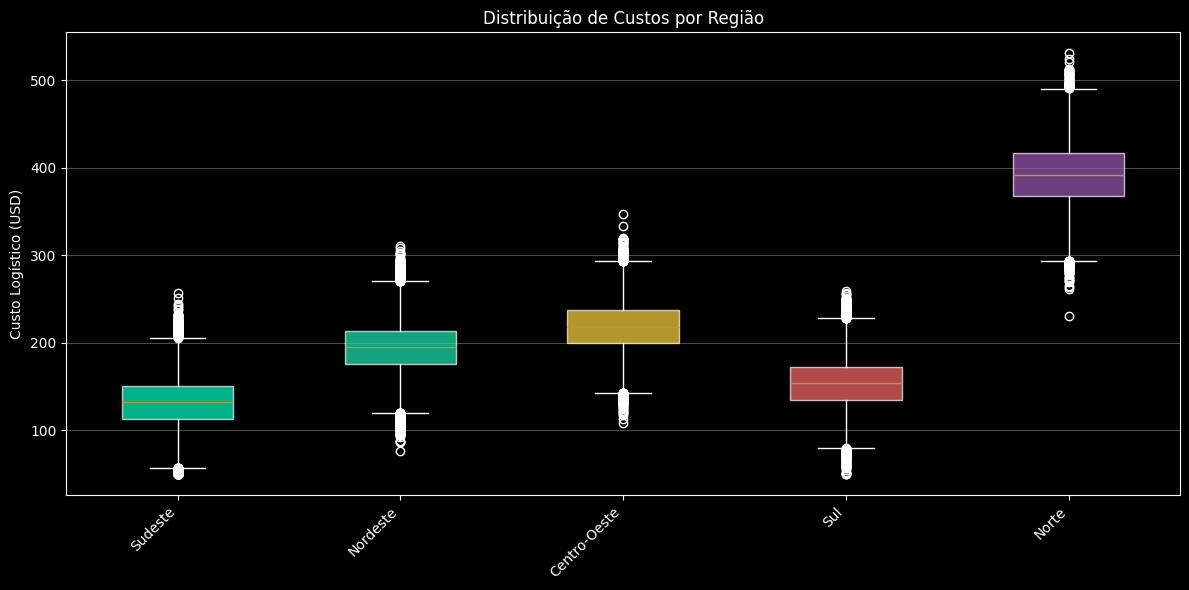

In [10]:
# Visualização: Distribuição de custos
fig, ax = plt.subplots(figsize=(12, 6))

regioes = df['Regiao'].unique()
data_to_plot = [df[df['Regiao'] == reg]['Custo_Logistico_USD'].values for reg in regioes]

bp = ax.boxplot(data_to_plot, labels=regioes, patch_artist=True)

# Cores para cada região
colors = ['#00FFC6', '#1DE9B6', '#FFD93D', '#FF6B6B', '#9B59B6']
for patch, color in zip(bp['boxes'], colors[:len(regioes)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_ylabel('Custo Logístico (USD)', color='white')
ax.set_title('Distribuição de Custos por Região', color='white')
ax.tick_params(colors='white')
plt.xticks(rotation=45, ha='right')
ax.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


Custo Total por Região:
Regiao
Nordeste       14,118,372.71
Norte          13,049,689.70
Sudeste        10,947,736.72
Centro-Oeste    9,214,030.27
Sul             9,082,049.00
Name: Custo_Logistico_USD, dtype: float64

Custo Total Geral: $56,411,878.40 USD


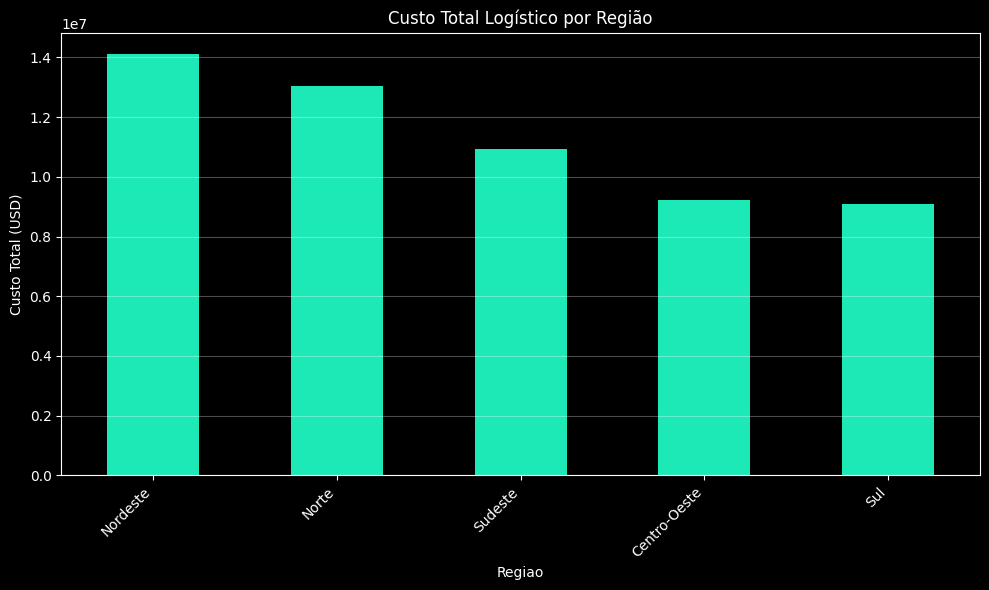

In [11]:
# Custo total por região
custo_total_regiao = df.groupby('Regiao')['Custo_Logistico_USD'].sum().sort_values(ascending=False)

print("Custo Total por Região:")
print(custo_total_regiao)
print(f"\nCusto Total Geral: ${custo_total_regiao.sum():,.2f} USD")

# Visualização
fig, ax = plt.subplots(figsize=(10, 6))
custo_total_regiao.plot(kind='bar', ax=ax, color='#1DE9B6')
ax.set_ylabel('Custo Total (USD)', color='white')
ax.set_title('Custo Total Logístico por Região', color='white')
ax.tick_params(colors='white')
plt.xticks(rotation=45, ha='right')
ax.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


## 5. Análise de Emissões de CO2


In [12]:
# Emissão média por região
emissao_por_regiao = df.groupby('Regiao')['Emissao_CO2_kg'].agg([
    'mean', 'sum', 'std'
]).round(2)

print("Emissões de CO2 por Região:")
print(emissao_por_regiao.sort_values('mean'))
print(f"\nEmissão Total: {emissao_por_regiao['sum'].sum():,.2f} kg CO2")


Emissões de CO2 por Região:
              mean          sum  std
Regiao                              
Sudeste      27.99 2,327,124.46 3.99
Sul          33.58 1,985,098.94 4.02
Nordeste     43.99 3,183,392.79 4.00
Centro-Oeste 47.99 2,026,150.77 4.00
Norte        76.03 2,527,978.85 4.01

Emissão Total: 12,049,745.81 kg CO2


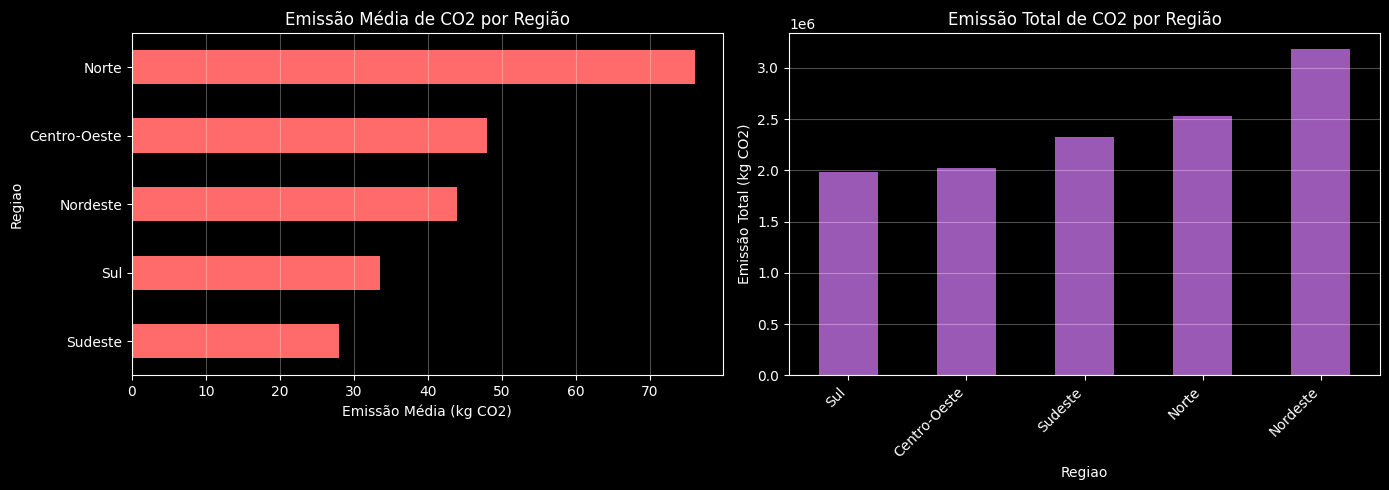

In [13]:
# Visualização: Emissões
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Emissão média
emissao_por_regiao['mean'].sort_values().plot(kind='barh', ax=ax1, color='#FF6B6B')
ax1.set_xlabel('Emissão Média (kg CO2)', color='white')
ax1.set_title('Emissão Média de CO2 por Região', color='white')
ax1.tick_params(colors='white')
ax1.grid(alpha=0.3, axis='x')

# Emissão total
emissao_por_regiao['sum'].sort_values().plot(kind='bar', ax=ax2, color='#9B59B6')
ax2.set_ylabel('Emissão Total (kg CO2)', color='white')
ax2.set_title('Emissão Total de CO2 por Região', color='white')
ax2.tick_params(colors='white')
plt.xticks(rotation=45, ha='right')
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 6. Análise de Performance e Eficiência


In [14]:
# Taxa de atraso por região
taxa_atraso = df.groupby('Regiao').apply(
    lambda x: (x['Status'] == 'Atrasado').sum() / len(x) * 100
).round(2)

print("Taxa de Atraso por Região (%):")
print(taxa_atraso.sort_values())


Taxa de Atraso por Região (%):
Regiao
Centro-Oeste   0.00
Nordeste       0.00
Norte          0.00
Sul            0.14
Sudeste        1.86
dtype: float64


Matriz de Correlação:
                     Tempo_Resposta_Real  Custo_Logistico_USD  Emissao_CO2_kg
Tempo_Resposta_Real                 1.00                 0.86            0.88
Custo_Logistico_USD                 0.86                 1.00            0.90
Emissao_CO2_kg                      0.88                 0.90            1.00


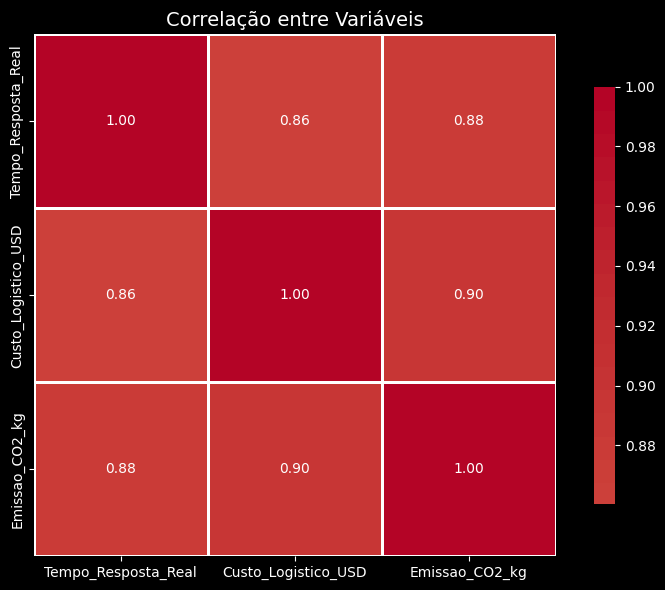

In [15]:
# Correlação entre variáveis
correlacao = df[['Tempo_Resposta_Real', 'Custo_Logistico_USD', 'Emissao_CO2_kg']].corr()

print("Matriz de Correlação:")
print(correlacao)

# Visualização
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlação entre Variáveis', color='white', fontsize=14)
plt.tight_layout()
plt.show()


In [16]:
# Análise de eficiência: Tempo vs Custo vs Emissão
eficiencia = df.groupby('Regiao').agg({
    'Tempo_Resposta_Real': 'mean',
    'Custo_Logistico_USD': 'mean',
    'Emissao_CO2_kg': 'mean'
}).round(2)

print("Métricas de Eficiência por Região:")
print(eficiencia)


Métricas de Eficiência por Região:
              Tempo_Resposta_Real  Custo_Logistico_USD  Emissao_CO2_kg
Regiao                                                                
Centro-Oeste                 2.38               218.25           47.99
Nordeste                     1.97               195.08           43.99
Norte                        4.11               392.47           76.03
Sudeste                      1.30               131.68           27.99
Sul                          1.50               153.61           33.58


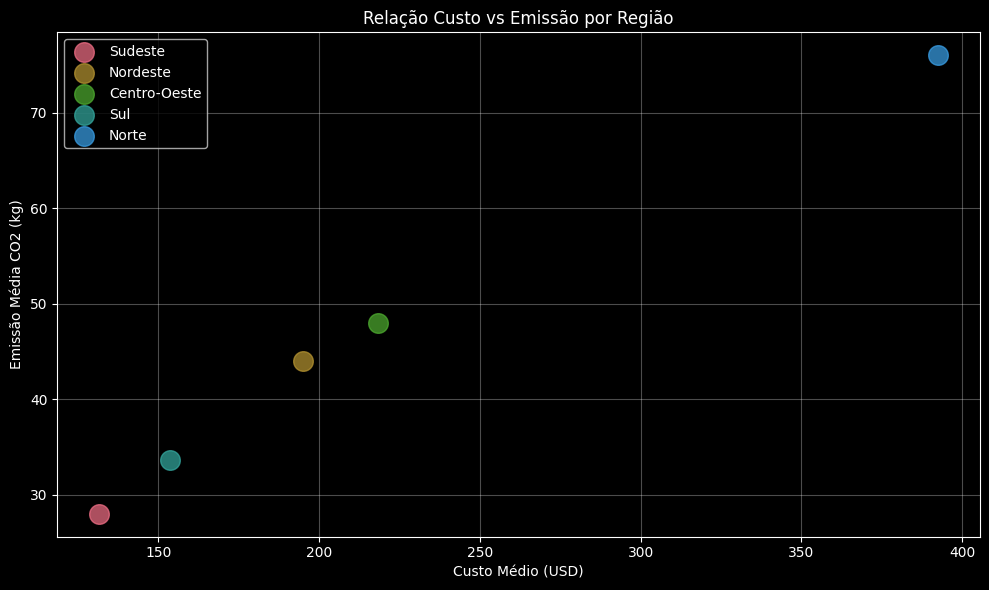

In [17]:
# Visualização: Scatter plot Custo vs Emissão
fig, ax = plt.subplots(figsize=(10, 6))

for regiao in df['Regiao'].unique():
    dados_regiao = df[df['Regiao'] == regiao]
    ax.scatter(dados_regiao['Custo_Logistico_USD'].mean(), 
               dados_regiao['Emissao_CO2_kg'].mean(),
               s=200, alpha=0.7, label=regiao)

ax.set_xlabel('Custo Médio (USD)', color='white')
ax.set_ylabel('Emissão Média CO2 (kg)', color='white')
ax.set_title('Relação Custo vs Emissão por Região', color='white')
ax.legend()
ax.tick_params(colors='white')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 7. Análise Temporal


In [18]:
# Tendência de tempo ao longo do tempo
df['Ano'] = df['Data'].dt.year
df['Mes'] = df['Data'].dt.month

tendencia_tempo = df.groupby(['Ano', 'Mes'])['Tempo_Resposta_Real'].mean().reset_index()
tendencia_tempo['Data_Mes'] = pd.to_datetime(
    tendencia_tempo['Ano'].astype(str) + '-' + 
    tendencia_tempo['Mes'].astype(str) + '-01'
)

print("Tendência de Tempo de Entrega:")
print(tendencia_tempo.head(10))


Tendência de Tempo de Entrega:
    Ano  Mes  Tempo_Resposta_Real   Data_Mes
0  2020    2                 1.00 2020-02-01
1  2020    3                 2.23 2020-03-01
2  2020    4                 2.19 2020-04-01
3  2020    5                 2.27 2020-05-01
4  2020    6                 2.23 2020-06-01
5  2020    7                 2.09 2020-07-01
6  2020    8                 2.07 2020-08-01
7  2020    9                 2.04 2020-09-01
8  2020   10                 1.93 2020-10-01
9  2020   11                 1.88 2020-11-01


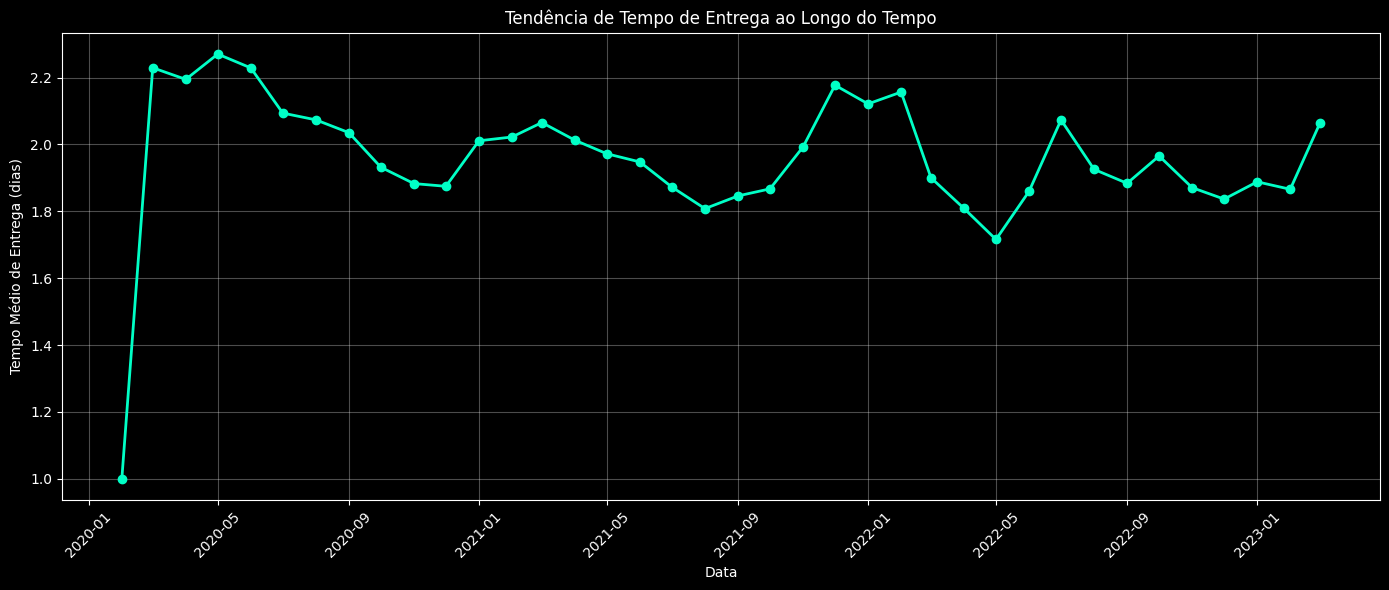

In [19]:
# Visualização: Tendência temporal
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(tendencia_tempo['Data_Mes'], tendencia_tempo['Tempo_Resposta_Real'], 
        marker='o', linewidth=2, color='#00FFC6')
ax.set_xlabel('Data', color='white')
ax.set_ylabel('Tempo Médio de Entrega (dias)', color='white')
ax.set_title('Tendência de Tempo de Entrega ao Longo do Tempo', color='white')
ax.tick_params(colors='white')
ax.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 8. Insights e Conclusões


## 9. Análise de Clustering


In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preparar dados para clustering por estado
dados_cluster = df.groupby('Estado').agg({
    'Tempo_Resposta_Real': 'mean',
    'Custo_Logistico_USD': 'mean',
    'Emissao_CO2_kg': 'mean'
}).reset_index()

# Normalizar dados
scaler = StandardScaler()
features = ['Tempo_Resposta_Real', 'Custo_Logistico_USD', 'Emissao_CO2_kg']
X = scaler.fit_transform(dados_cluster[features])

print("Dados preparados para clustering:")
print(f"Estados: {len(dados_cluster)}")
print(f"Features: {features}")
print("\nEstatísticas normalizadas:")
print(pd.DataFrame(X, columns=features).describe())


Dados preparados para clustering:
Estados: 27
Features: ['Tempo_Resposta_Real', 'Custo_Logistico_USD', 'Emissao_CO2_kg']

Estatísticas normalizadas:
       Tempo_Resposta_Real  Custo_Logistico_USD  Emissao_CO2_kg
count                27.00                27.00           27.00
mean                  0.00                 0.00            0.00
std                   1.02                 1.02            1.02
min                  -1.24                -1.09           -1.26
25%                  -0.79                -0.65           -0.62
50%                  -0.34                -0.40           -0.31
75%                   0.59                 0.68            0.74
max                   1.85                 1.75            1.57


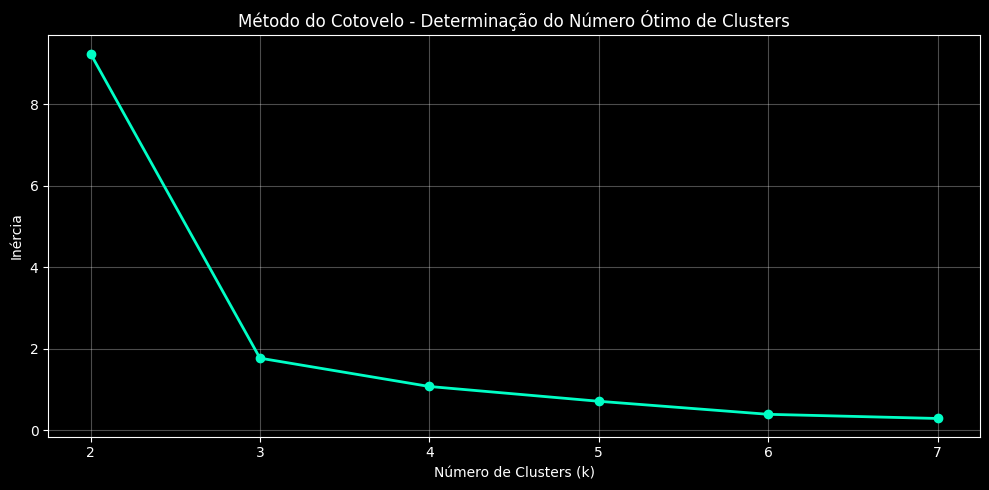

Inércias por número de clusters:
  k=2: 9.24
  k=3: 1.77
  k=4: 1.07
  k=5: 0.71
  k=6: 0.39
  k=7: 0.29


In [21]:
# Determinar número ótimo de clusters usando método do cotovelo
inertias = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Visualizar método do cotovelo
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(K_range, inertias, marker='o', linewidth=2, color='#00FFC6')
ax.set_xlabel('Número de Clusters (k)', color='white')
ax.set_ylabel('Inércia', color='white')
ax.set_title('Método do Cotovelo - Determinação do Número Ótimo de Clusters', color='white')
ax.tick_params(colors='white')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Inércias por número de clusters:")
for k, inertia in zip(K_range, inertias):
    print(f"  k={k}: {inertia:.2f}")


In [22]:
# Aplicar K-Means com número ótimo de clusters (escolher baseado no gráfico)
n_clusters = 4  # Ajustar conforme necessário
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Adicionar clusters aos dados
dados_cluster['Cluster'] = clusters

print(f"Clustering realizado com {n_clusters} clusters:")
print(f"\nDistribuição de estados por cluster:")
print(dados_cluster['Cluster'].value_counts().sort_index())

print(f"\nEstados por cluster:")
for i in range(n_clusters):
    estados_cluster = dados_cluster[dados_cluster['Cluster'] == i]['Estado'].tolist()
    print(f"\nCluster {i} ({len(estados_cluster)} estados):")
    print(f"  {', '.join(estados_cluster)}")


Clustering realizado com 4 clusters:

Distribuição de estados por cluster:
Cluster
0    7
1    7
2    9
3    4
Name: count, dtype: int64

Estados por cluster:

Cluster 0 (7 estados):
  ES, MG, PR, RJ, RS, SC, SP

Cluster 1 (7 estados):
  AC, AM, AP, PA, RO, RR, TO

Cluster 2 (9 estados):
  AL, BA, CE, MA, PB, PE, PI, RN, SE

Cluster 3 (4 estados):
  DF, GO, MS, MT


Características Médias por Cluster:
         Tempo_Resposta_Real  Custo_Logistico_USD  Emissao_CO2_kg
Cluster                                                          
0                       1.40               140.99           30.38
1                       4.20               388.12           76.02
2                       2.03               194.05           43.99
3                       2.42               217.90           47.99


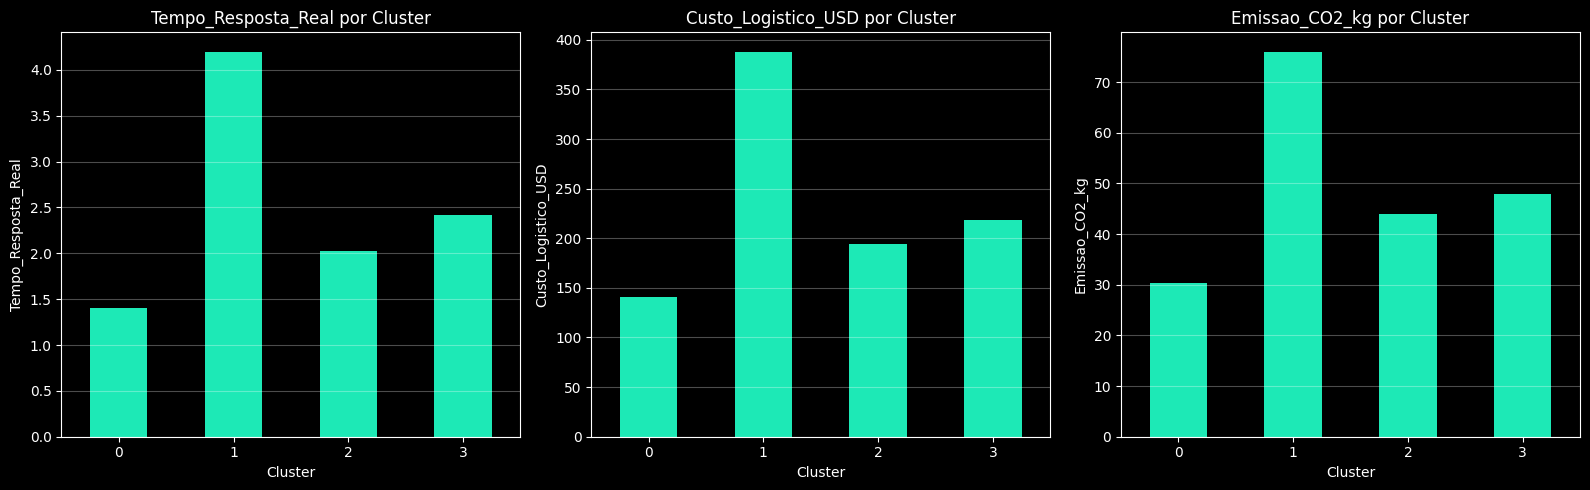

In [23]:
# Características médias de cada cluster
caracteristicas_cluster = dados_cluster.groupby('Cluster')[features].mean().round(2)

print("Características Médias por Cluster:")
print(caracteristicas_cluster)

# Visualização
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, feature in enumerate(features):
    ax = axes[idx]
    caracteristicas_cluster[feature].plot(kind='bar', ax=ax, color='#1DE9B6')
    ax.set_title(f'{feature} por Cluster', color='white')
    ax.set_xlabel('Cluster', color='white')
    ax.set_ylabel(feature, color='white')
    ax.tick_params(colors='white')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
    ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


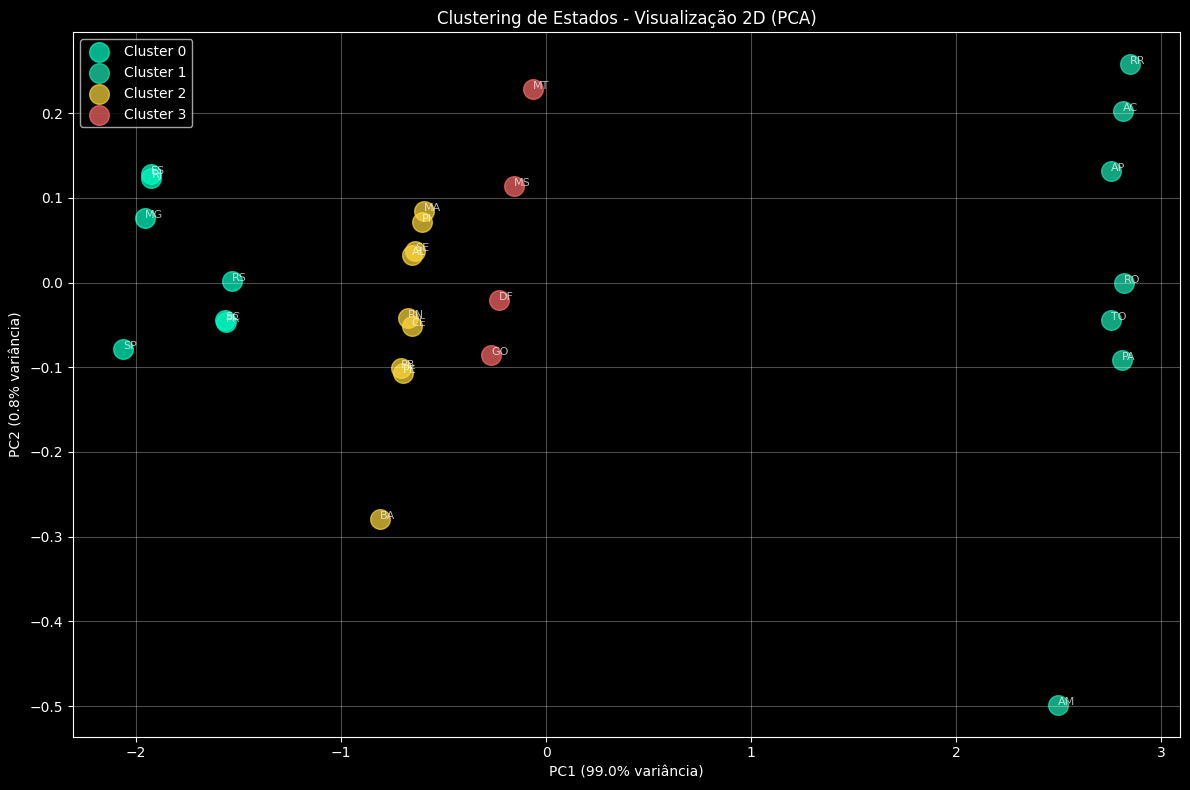


Variância explicada por componente:
  PC1: 99.01%
  PC2: 0.77%
  Total: 99.78%


In [24]:
# Visualização 2D usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Criar DataFrame para visualização
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Estado'] = dados_cluster['Estado']
df_pca['Cluster'] = clusters
df_pca['Regiao'] = dados_cluster['Estado'].map(
    df.groupby('Estado')['Regiao'].first().to_dict()
)

# Visualizar clusters em 2D
fig, ax = plt.subplots(figsize=(12, 8))

# Cores para cada cluster
colors_cluster = ['#00FFC6', '#1DE9B6', '#FFD93D', '#FF6B6B', '#9B59B6', '#3498DB']
for i in range(n_clusters):
    cluster_data = df_pca[df_pca['Cluster'] == i]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], 
              s=200, alpha=0.7, label=f'Cluster {i}', 
              color=colors_cluster[i % len(colors_cluster)])

# Adicionar labels dos estados
for idx, row in df_pca.iterrows():
    ax.annotate(row['Estado'], (row['PC1'], row['PC2']), 
               fontsize=8, alpha=0.7, color='white')

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variância)', color='white')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variância)', color='white')
ax.set_title('Clustering de Estados - Visualização 2D (PCA)', color='white')
ax.legend()
ax.tick_params(colors='white')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nVariância explicada por componente:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"  Total: {pca.explained_variance_ratio_.sum():.2%}")


In [25]:
# Análise detalhada de cada cluster
print("="*60)
print("ANÁLISE DETALHADA DOS CLUSTERS")
print("="*60)

for i in range(n_clusters):
    cluster_data = dados_cluster[dados_cluster['Cluster'] == i]
    print(f"\n{'='*60}")
    print(f"CLUSTER {i} - {len(cluster_data)} estados")
    print(f"{'='*60}")
    
    print(f"\nEstados:")
    print(f"  {', '.join(cluster_data['Estado'].tolist())}")
    
    print(f"\nCaracterísticas Médias:")
    print(f"  • Tempo de Entrega: {cluster_data['Tempo_Resposta_Real'].mean():.2f} dias")
    print(f"  • Custo Logístico: ${cluster_data['Custo_Logistico_USD'].mean():.2f} USD")
    print(f"  • Emissão CO2: {cluster_data['Emissao_CO2_kg'].mean():.2f} kg")
    
    # Regiões predominantes
    regioes_cluster = df[df['Estado'].isin(cluster_data['Estado'])]['Regiao'].value_counts()
    print(f"\nRegiões Representadas:")
    for regiao, count in regioes_cluster.items():
        print(f"  • {regiao}: {count} estados")

print("\n" + "="*60)


ANÁLISE DETALHADA DOS CLUSTERS

CLUSTER 0 - 7 estados

Estados:
  ES, MG, PR, RJ, RS, SC, SP

Características Médias:
  • Tempo de Entrega: 1.40 dias
  • Custo Logístico: $140.99 USD
  • Emissão CO2: 30.38 kg

Regiões Representadas:
  • Sudeste: 83138 estados
  • Sul: 59123 estados

CLUSTER 1 - 7 estados

Estados:
  AC, AM, AP, PA, RO, RR, TO

Características Médias:
  • Tempo de Entrega: 4.20 dias
  • Custo Logístico: $388.12 USD
  • Emissão CO2: 76.02 kg

Regiões Representadas:
  • Norte: 33250 estados

CLUSTER 2 - 9 estados

Estados:
  AL, BA, CE, MA, PB, PE, PI, RN, SE

Características Médias:
  • Tempo de Entrega: 2.03 dias
  • Custo Logístico: $194.05 USD
  • Emissão CO2: 43.99 kg

Regiões Representadas:
  • Nordeste: 72371 estados

CLUSTER 3 - 4 estados

Estados:
  DF, GO, MS, MT

Características Médias:
  • Tempo de Entrega: 2.42 dias
  • Custo Logístico: $217.90 USD
  • Emissão CO2: 47.99 kg

Regiões Representadas:
  • Centro-Oeste: 42217 estados



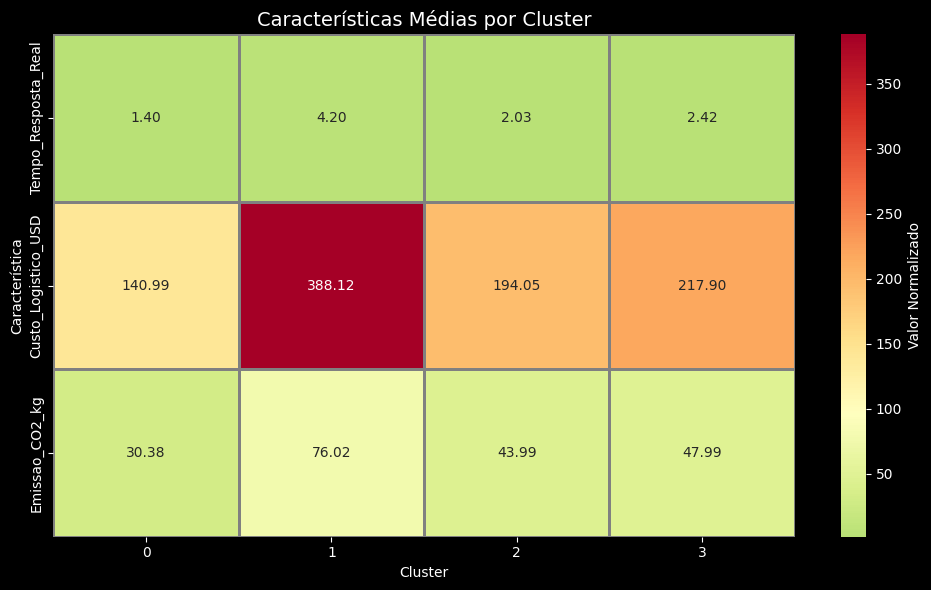

In [26]:
# Visualização: Heatmap de características por cluster
fig, ax = plt.subplots(figsize=(10, 6))

# Preparar dados para heatmap
heatmap_data = dados_cluster.groupby('Cluster')[features].mean().T

sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='RdYlGn_r', 
           center=heatmap_data.mean().mean(), cbar_kws={'label': 'Valor Normalizado'},
           ax=ax, linewidths=1, linecolor='gray')

ax.set_title('Características Médias por Cluster', color='white', fontsize=14)
ax.set_xlabel('Cluster', color='white')
ax.set_ylabel('Característica', color='white')
ax.tick_params(colors='white', labelsize=10)

plt.tight_layout()
plt.show()


In [30]:
# Adicionar Regiao ao dados_cluster
dados_cluster['Regiao'] = dados_cluster['Estado'].map(
    df.groupby('Estado')['Regiao'].first().to_dict()
)

# Tabela resumo com clusters
resumo_clusters = dados_cluster[['Estado', 'Regiao', 'Cluster', 
                                  'Tempo_Resposta_Real', 'Custo_Logistico_USD', 
                                  'Emissao_CO2_kg']].sort_values('Cluster')

print("Resumo Completo - Estados e seus Clusters:")
print(resumo_clusters.to_string(index=False))

# Salvar resultados (opcional)
# resumo_clusters.to_csv('resultados_clustering_logistica.csv', index=False)
# print("\n✅ Resultados salvos em 'resultados_clustering_logistica.csv'")


Resumo Completo - Estados e seus Clusters:
Estado       Regiao  Cluster  Tempo_Resposta_Real  Custo_Logistico_USD  Emissao_CO2_kg
    ES      Sudeste        0                 1.41               130.75           27.98
    MG      Sudeste        0                 1.35               131.84           27.99
    RJ      Sudeste        0                 1.41               131.59           27.97
    SP      Sudeste        0                 1.14               131.98           28.01
    SC          Sul        0                 1.48               153.25           33.57
    RS          Sul        0                 1.54               153.50           33.58
    PR          Sul        0                 1.48               154.02           33.57
    AP        Norte        1                 4.31               378.23           75.98
    RO        Norte        1                 4.24               393.72           76.07
    TO        Norte        1                 4.16               390.75           76.03


In [29]:
# Resumo executivo
print("="*60)
print("RESUMO EXECUTIVO - ANÁLISE DE LOGÍSTICA")
print("="*60)

print(f"\n📊 Total de Rotas Analisadas: {len(df):,}")
print(f"📅 Período: {df['Data'].min().date()} a {df['Data'].max().date()}")

print(f"\n⚡ PERFORMANCE:")
print(f"  • Tempo médio de entrega: {df['Tempo_Resposta_Real'].mean():.2f} dias")
print(f"  • Redução média vs previsto: {(1 - df['Tempo_Resposta_Real'].mean() / df['Tempo_Resposta_Previsto'].mean()) * 100:.1f}%")
print(f"  • Taxa de atraso: {(df['Status'] == 'Atrasado').sum() / len(df) * 100:.2f}%")

print(f"\n💰 CUSTOS:")
print(f"  • Custo médio por rota: ${df['Custo_Logistico_USD'].mean():.2f} USD")
print(f"  • Custo total: ${df['Custo_Logistico_USD'].sum():,.2f} USD")

print(f"\n🌍 SUSTENTABILIDADE:")
print(f"  • Emissão média por rota: {df['Emissao_CO2_kg'].mean():.2f} kg CO2")
print(f"  • Emissão total: {df['Emissao_CO2_kg'].sum():,.2f} kg CO2")

print(f"\n🏆 REGIÃO MAIS EFICIENTE:")
regiao_eficiente = df.groupby('Regiao')['Tempo_Resposta_Real'].mean().idxmin()
print(f"  • {regiao_eficiente}: {df[df['Regiao'] == regiao_eficiente]['Tempo_Resposta_Real'].mean():.2f} dias")

print(f"\n⚠️ REGIÃO COM MAIOR DESAFIO:")
regiao_desafio = df.groupby('Regiao')['Tempo_Resposta_Real'].mean().idxmax()
print(f"  • {regiao_desafio}: {df[df['Regiao'] == regiao_desafio]['Tempo_Resposta_Real'].mean():.2f} dias")

print("\n" + "="*60)


RESUMO EXECUTIVO - ANÁLISE DE LOGÍSTICA

📊 Total de Rotas Analisadas: 290,099
📅 Período: 2020-02-25 a 2023-03-18

⚡ PERFORMANCE:
  • Tempo médio de entrega: 1.99 dias
  • Redução média vs previsto: 24.4%
  • Taxa de atraso: 0.56%

💰 CUSTOS:
  • Custo médio por rota: $194.46 USD
  • Custo total: $56,411,878.40 USD

🌍 SUSTENTABILIDADE:
  • Emissão média por rota: 41.54 kg CO2
  • Emissão total: 12,049,745.81 kg CO2

🏆 REGIÃO MAIS EFICIENTE:
  • Sudeste: 1.30 dias

⚠️ REGIÃO COM MAIOR DESAFIO:
  • Norte: 4.11 dias

